In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from io import StringIO

sns.set_theme(context='paper', style='darkgrid', palette='muted', color_codes=True)

In [2]:
def parse_time(text):
    total = 0.0
    
    words = iter(text.split())
    for count in words:
        mod = next(words)
        
        num = float(count)
        if mod.startswith('h'):
            num *= 60 * 60
        if mod.startswith('m'):
            num *= 60
        total += num
    return total


In [3]:
tabledata = StringIO("""
J & F & L & M & P & Vars. & Restrs. & Iters. &Tempo de Execução& Custo Final 
100 & 126 & 5 & 8 & 5 & 66150 & 2768 & 12753 & 8.9 s & 160268.5
200 & 299 & 5 & 8 & 5 & 306475 & 6382 & 58689 & 5 min 13 s & 309782.7
300 & 393 & 8 & 8 & 5 & 605220 & 9753 & 93678 & 26 min 37 s & 455172.4
""")

df = pd.read_csv(tabledata, sep="&")
df['tempo'] = np.asarray([parse_time(t) for t in df['Tempo de Execução']])
df

,J,F,L,M,P,Vars.,Restrs.,Iters.,Tempo de Execução,Custo Final,tempo
0,100,126,5,8,5,66150,2768,12753,8.9 s,160268.5,8.9
1,200,299,5,8,5,306475,6382,58689,5 min 13 s,309782.7,313.0
2,300,393,8,8,5,605220,9753,93678,26 min 37 s,455172.4,1597.0


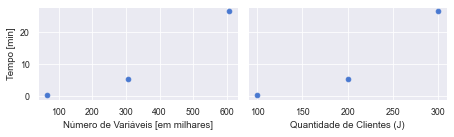

In [33]:
fig, (ax0, ax1) = plt.subplots(1, 2, sharey=True, figsize=(6.4, 2))

ax0.scatter(df[' Vars. '] / 1000, df['tempo'] / 60)
ax0.set_xlabel('Número de Variáveis [em milhares]')
ax1.scatter(df['J '], df['tempo'] / 60)
ax1.set_xlabel('Quantidade de Clientes (J)')

ax0.set_ylabel('Tempo [min]')

plt.tight_layout()
plt.savefig('relatorio/figuras/tempo_variaveis.pgf')